# Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, we will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.


# Problem Statement 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Cleaning</a>

<a href=#five>5. Engineering Features</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. References</a>

### 1. Importing Packages

In [1]:
#libraries for loading and manipulating data.
import numpy as np
import pandas as pd

#libraries for NLP and text preprocessing
import nltk
import re
import string 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample

#libraries for visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from wordcloud import WordCloud

#libraries for modelling
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB

#libraries for score metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, log_loss


# set plot style
sns.set()

### 2. Loading Data

In [2]:
#load training data
df_train = pd.read_csv('train_set.csv')
df_test=pd.read_csv('test_set.csv')

pd.set_option('max_colwidth', -1)#
df_train.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9756\2647850148.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


### 3. Exploratory Data Analysis (EDA)

After loading in our dataset we first start with the vital component EDA to better understand the dataset we are working with and, to gain insight about the features and labels by performing Univariate or Multivariate , Non-graphical or Graphical Analysis"

We take a look quick look at the first few rows of the training and testing dataset to have an overview of our features and labels, (using pd.head() method)

In [43]:
from wordcloud import WordCloud

In [48]:
# Visualize the frequent words 
all_words = " ".join([sentence for sentence in df_train['text']])

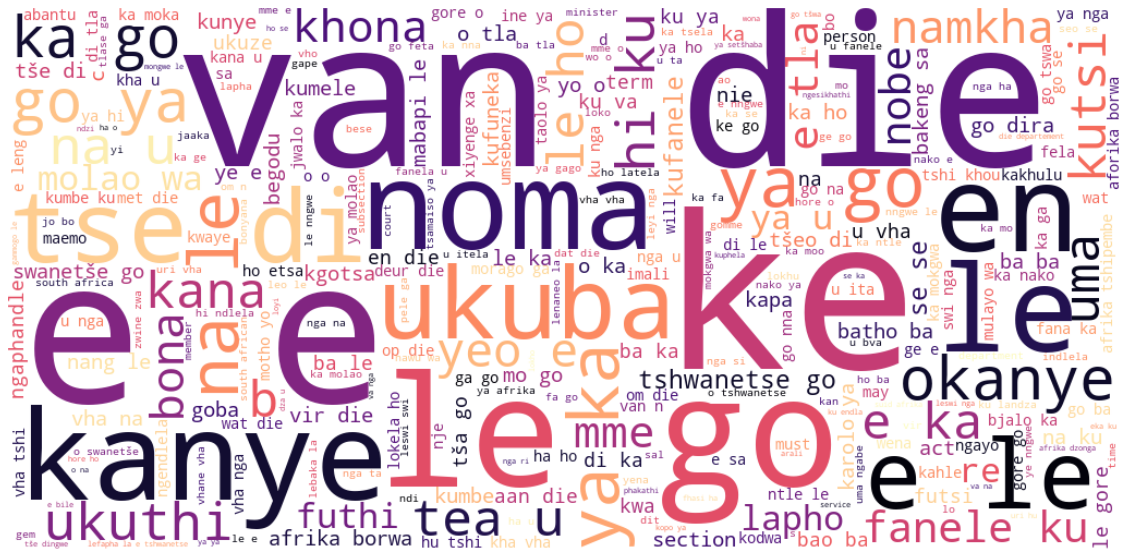

In [47]:
wordcloud = WordCloud(background_color="white", 
                      max_words=300,
                      width=1024, 
                      height=500,
                      colormap="magma"                      
                     ).generate(all_words)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("cloud.png", format="png")
plt.show()

### 4. Data Cleaning & feature engineering

In [3]:
def clean_text(text):
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    text=re.sub('[^a-zA-Z#]', ' ',text)
    # will convert to lower case
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [4]:
#remove special characters, and punctuation then coverting to lower
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)
df_train.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,umgaqo siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,i dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,the province of kwazulu natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,o netefat a gore o ba file dilo ka moka t e le dumelelanego ka t ona mohlala maleri a magolo a a omi wago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go omela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


df_test.head()

### 6. Modeling

#### **6.1 Vectorization**

In [8]:
# vectorization clean training data 
vect = TfidfVectorizer(min_df=2, 
                      max_df=0.9,
                       #max_features= 1000,
                       ngram_range=(3, 6),
                       analyzer=('char'))


In [9]:
#fit and transorm data 
training_x = vect.fit_transform(df_train['clean_text']) 

In [10]:
#vectorize test data set,here we are only trasforming and unlike for train data whic we fit_transform
X_test_features = vect.transform(df_test['clean_text'])


In [11]:
X_test_features.shape

(5682, 655397)

#### **6.2 Spliting Train dataset**

In [13]:
#define features and variables
X = training_x 
y = df_train['lang_id']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X.shape

(33000, 655397)

**Modeling**

**logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
lm=LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000)

In [16]:
lm.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=4000, multi_class='ovr', n_jobs=1,
                   random_state=42)

In [17]:
#generate predictionsS
lm_tuned_pred = lm.predict(X_test)

In [18]:
ac = accuracy_score(y_test, lm_tuned_pred)
print("Accuracy is :",ac)

Accuracy is : 0.9987878787878788


In [19]:
#predicting the test data
test_pred = lm.predict(X_test_features)

In [20]:
# Saving test predictions to csv file
output = pd.DataFrame({'index': df_test['index'],
                       'lang_id': test_pred})
output.to_csv('Logistic_reg_submission.csv', index=False)

### Passive Aggresive Classifier

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train, y_train)
pred = pass_tf.predict(X_test)


acc = accuracy_score(y_test, pred)#metrics reporting
report = classification_report(y_test,pred)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9989393939393939
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [26]:
#predicting the test data
test_pred2 = pass_tf.predict(X_test_features)

In [27]:
# Saving test predictions to csv file
output = pd.DataFrame({'index': df_test['index'],
                       'lang_id': test_pred2})
output.to_csv('PAC.csv', index=False)

**Multinomial Naive Bayes**

In [34]:
from sklearn.naive_bayes import MultinomialNB
model2= MultinomialNB()

model2.fit(X_train, y_train)  # Fitting the model

y_pred_mnb =model2.predict(X_test)  # predicting the fit on validation set

print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [36]:
acc = accuracy_score(y_test, y_pred_mnb)#metrics reporting
print("Accuracy is :",acc)

Accuracy is : 0.9993939393939394


In [38]:
#predicting the test data
test_pred3 = model2.predict(X_test_features)

In [39]:
# Saving test predictions to csv file
output = pd.DataFrame({'index': df_test['index'],
                       'lang_id': test_pred3})
output.to_csv('MNB.csv', index=False)

### 7. Model Performance

In [ ]:
names = ['MultinomialNB', 'Random Forest',
         'LogisticRegression', 'BernoulliNB','SVC','PassiveAggressiveClassifier'
         ]

In [ ]:
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1),
    BernoulliNB(),
    SVC(kernel='rbf'),
    PassiveAggressiveClassifier() 
    ]

### 8. Model Explanation

### 9.References